In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM,Dense

In [2]:
data = pd.read_csv('TAP.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,7/22/2015,71.269997,71.940002,71.169998,71.360001,63.412666,739700
1,7/23/2015,71.260002,71.260002,70.699997,70.820000,62.932804,1164800
2,7/24/2015,70.860001,71.010002,69.680000,70.000000,62.204117,715800
3,7/27/2015,69.519997,69.709999,68.570000,69.540001,61.795364,1404100
4,7/28/2015,69.639999,69.709999,68.629997,69.309998,61.590973,1337100


In [3]:
data1 = data.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'])
data1.head()

,Date,Close
0,7/22/2015,71.360001
1,7/23/2015,70.820000
2,7/24/2015,70.000000
3,7/27/2015,69.540001
4,7/28/2015,69.309998


Text(0.5, 1.0, 'TAP (MillerCoors) Stock History')

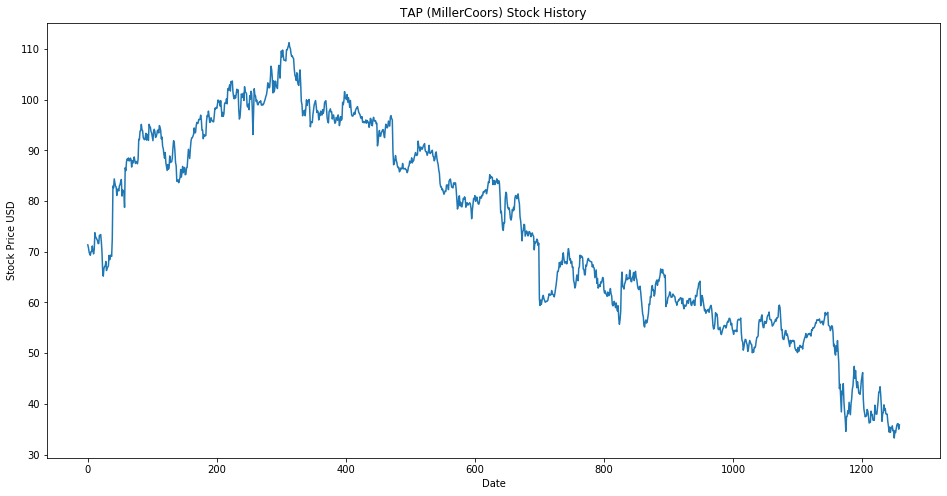

In [4]:
data1["Date"]=pd.to_datetime(data1.Date,format="%m/%d/%Y")
plt.figure(figsize=(16,8))
plt.plot(data1["Close"])
plt.ylabel('Stock Price USD')
plt.xlabel('Date')
plt.title('TAP (MillerCoors) Stock History')

In [5]:
model_df = data1.iloc[0:619,:]
model_df.head()

,Date,Close
0,2015-07-22,71.360001
1,2015-07-23,70.820000
2,2015-07-24,70.000000
3,2015-07-27,69.540001
4,2015-07-28,69.309998


In [6]:
from sklearn.model_selection import train_test_split

input_data = []
output_data = []

for i in range(60,len(model_df)):
    input_data.append(model_df.loc[i-60:i,"Close"])
    output_data.append(model_df.loc[i,"Close"])

X = np.array(input_data)
y = np.array(output_data).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23)

In [7]:
# Scale the data
X_scaler=MinMaxScaler(feature_range=(0,1)).fit(X_train)
y_scaler=MinMaxScaler(feature_range=(0,1)).fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [8]:
# Reshape training data to fit model
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0],X_train_scaled.shape[1],1))

In [9]:
model=Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(X_train_scaled.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train_scaled,y_train_scaled,epochs=10,batch_size=65,verbose=2)

Train on 419 samples
Epoch 1/10
419/419 - 4s - loss: 0.1091
Epoch 2/10
419/419 - 0s - loss: 0.0255
Epoch 3/10
419/419 - 0s - loss: 0.0148
Epoch 4/10
419/419 - 0s - loss: 0.0095
Epoch 5/10
419/419 - 0s - loss: 0.0087
Epoch 6/10
419/419 - 0s - loss: 0.0059
Epoch 7/10
419/419 - 0s - loss: 0.0058
Epoch 8/10
419/419 - 0s - loss: 0.0050
Epoch 9/10
419/419 - 0s - loss: 0.0047
Epoch 10/10
419/419 - 0s - loss: 0.0043


In [10]:
# Reshape testing data to fit new model
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

In [11]:
# Evaluate the model
model_loss = model.evaluate(X_test_scaled, y_test_scaled, verbose=2)
print(f"Loss: {model_loss}")

140/1 - 1s - loss: 0.0043
Loss: 0.005103021214849183


In [12]:
# Predict y values for test data, then see how closely they match actuals
predicted_closing_price=model.predict(X_test_scaled)
predicted_closing_price=y_scaler.inverse_transform(predicted_closing_price)
predicted_closing_price

array([[ 88.38298 ],
       [ 98.67599 ],
       [ 92.8116  ],
       [ 93.64113 ],
       [ 95.220314],
       [ 81.02394 ],
       [100.15873 ],
       [109.37785 ],
       [ 95.75544 ],
       [ 89.69288 ],
       [103.49594 ],
       [100.13818 ],
       [ 89.39923 ],
       [ 80.80823 ],
       [103.34274 ],
       [ 96.76052 ],
       [ 95.45045 ],
       [ 98.14758 ],
       [ 80.69899 ],
       [101.772835],
       [ 96.39927 ],
       [ 97.71099 ],
       [ 99.15824 ],
       [ 80.69822 ],
       [ 96.52989 ],
       [ 89.01947 ],
       [ 91.08407 ],
       [ 95.799576],
       [ 93.75019 ],
       [ 97.943054],
       [ 94.022865],
       [ 99.655266],
       [ 95.794014],
       [ 95.8841  ],
       [ 99.46503 ],
       [ 99.17629 ],
       [ 94.86085 ],
       [ 89.79402 ],
       [ 90.362625],
       [ 97.53488 ],
       [ 92.37295 ],
       [ 95.535706],
       [103.27256 ],
       [ 93.66542 ],
       [ 99.67884 ],
       [ 89.552086],
       [108.19763 ],
       [100.4

In [13]:
predicted_stock_price = [predicted_closing_price[i][0] for i in range(len(predicted_closing_price))]

In [14]:
new_data = pd.DataFrame({"Predicted": predicted_stock_price})
new_data

,Predicted
0,88.382980
1,98.675987
2,92.811600
3,93.641129
4,95.220314
...,...
135,102.121841
136,97.968529
137,99.851364
138,95.390839


In [15]:
actual_values = y_test_scaled.reshape((y_test_scaled.shape[0], y_test_scaled.shape[1]))
actual_values = y_scaler.inverse_transform(actual_values)
actual_values

array([[ 92.190002],
       [ 96.709999],
       [ 88.120003],
       [ 92.730003],
       [ 96.019997],
       [ 80.519997],
       [102.559998],
       [108.300003],
       [ 94.860001],
       [ 90.660004],
       [106.779999],
       [101.709999],
       [ 93.879997],
       [ 79.199997],
       [103.660004],
       [ 98.300003],
       [ 91.730003],
       [ 98.760002],
       [ 79.370003],
       [101.510002],
       [ 95.889999],
       [ 96.660004],
       [ 97.099998],
       [ 79.540001],
       [ 95.370003],
       [ 90.870003],
       [ 86.029999],
       [ 95.779999],
       [ 94.540001],
       [ 96.459999],
       [ 94.080002],
       [ 99.900002],
       [ 95.809998],
       [ 96.32    ],
       [ 99.660004],
       [101.940002],
       [ 97.75    ],
       [ 85.769997],
       [ 86.660004],
       [100.529999],
       [ 92.5     ],
       [ 96.440002],
       [ 97.720001],
       [ 92.550003],
       [ 99.07    ],
       [ 86.57    ],
       [103.809998],
       [101.1

In [16]:
actuals = [actual_values[i][0] for i in range(len(actual_values))]
new_data["Actual"] = actuals
new_data

,Predicted,Actual
0,88.382980,92.190002
1,98.675987,96.709999
2,92.811600,88.120003
3,93.641129,92.730003
4,95.220314,96.019997
...,...,...
135,102.121841,105.930000
136,97.968529,97.849998
137,99.851364,101.879997
138,95.390839,92.300003


In [17]:
inputs = []

for i in range(619,len(data1)):
    inputs.append(data1.loc[i-60:i,"Close"])

X_forecast = np.array(inputs)
X_forecast_scaled = X_scaler.transform(X_forecast)

In [18]:
# Reshape data to use in model
X_forecast_scaled = X_forecast_scaled.reshape((X_forecast_scaled.shape[0],X_forecast_scaled.shape[1],1))

In [19]:
forecasted_closing_price = model.predict(X_forecast_scaled)
forecasted_closing_price=y_scaler.inverse_transform(forecasted_closing_price)
forecasted_closing_price

array([[82.06119 ],
       [82.201   ],
       [82.3748  ],
       [82.56691 ],
       [82.80712 ],
       [83.06372 ],
       [83.33102 ],
       [83.59796 ],
       [83.85182 ],
       [84.042145],
       [84.19184 ],
       [84.31587 ],
       [84.39382 ],
       [84.44763 ],
       [84.48144 ],
       [84.51865 ],
       [84.52953 ],
       [84.520004],
       [84.514175],
       [84.49678 ],
       [84.39505 ],
       [84.14068 ],
       [83.78163 ],
       [83.30254 ],
       [82.7023  ],
       [82.01987 ],
       [81.3419  ],
       [80.69045 ],
       [80.2151  ],
       [79.93775 ],
       [79.80626 ],
       [79.751274],
       [79.72949 ],
       [79.729454],
       [79.74187 ],
       [79.72981 ],
       [79.67003 ],
       [79.561646],
       [79.43183 ],
       [79.34332 ],
       [79.270164],
       [79.2246  ],
       [79.199554],
       [79.24832 ],
       [79.37863 ],
       [79.5587  ],
       [79.754166],
       [79.97559 ],
       [80.21734 ],
       [80.43604 ],


In [20]:
forecast = [forecasted_closing_price[i][0] for i in range(len(forecasted_closing_price))]

In [21]:
forecasted_stock = data1.iloc[619:,:]
forecasted_stock

,Date,Close
619,2018-01-04,82.000000
620,2018-01-05,82.930000
621,2018-01-08,83.820000
622,2018-01-09,83.629997
623,2018-01-10,85.209999
...,...,...
1254,2020-07-15,35.770000
1255,2020-07-16,36.070000
1256,2020-07-17,36.080002
1257,2020-07-20,35.000000


In [22]:
forecasted_stock["Prediction"] = forecast
forecasted_stock

C:\Users\Joymode\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Close,Prediction
619,2018-01-04,82.000000,82.061188
620,2018-01-05,82.930000,82.200996
621,2018-01-08,83.820000,82.374802
622,2018-01-09,83.629997,82.566910
623,2018-01-10,85.209999,82.807121
...,...,...,...
1254,2020-07-15,35.770000,53.599316
1255,2020-07-16,36.070000,53.576019
1256,2020-07-17,36.080002,53.572315
1257,2020-07-20,35.000000,53.578876


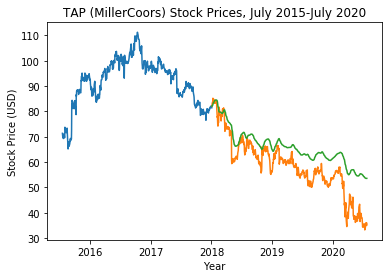

In [23]:
model_df = model_df.set_index("Date")
forecasted_stock = forecasted_stock.set_index("Date")
plt.xlabel('Year')
plt.ylabel('Stock Price (USD)')
plt.plot(model_df["Close"])
plt.plot(forecasted_stock[['Close',"Prediction"]])
plt.title("TAP (MillerCoors) Stock Prices, July 2015-July 2020")
plt.savefig('TAP_Prediction.png')